In [20]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Creamos un conjunto de datos ficticio con características:
- Tamaño de la casa en metros cuadrados (x1)
- Número de habitaciones (x2)
- Precio de la casa (y) = 30000x1 + 10000x2 + 50000

<!-- # Creamos un conjunto de datos ficticio con características:
# - Tamaño de la casa en metros cuadrados (X1)
# - Número de habitaciones (X2)
# - Precio de la casa (y) = 30000 * X1 + 10000 * X2 + 50000 (con algo de ruido) -->

In [21]:
# Fijamos una semilla
np.random.seed(42)

# Generamos nuestros datos de entrenamiento
tamano = np.random.randint(50, 220, size=100)
habitaciones = np.random.randint(1, 5, size=100) 
precio = 30000 * tamano + 10000 * habitaciones + 50000

In [22]:
# Juntamos nuestros arreglos en una sola matriz, donde:
# x1 = tamaño, x2 = habitaciones
x = np.column_stack((tamano, habitaciones))
y = precio 


# Dividimos los datos en conjunto de entrenamiento y prueba
# Creamos el modelo de regresión lineal
# Entrenamos el modelo
# Realizamos predicciones en el conjunto de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

# Predicciones vs Valores reales
# 1. 200 mts2 4 habitaciones
print(f'valor real = {30000 * 200 + 10000 * 4 + 50000}')
print(f'Predicción del modelo = {modelo.predict([[200, 4]])[0]}')

# 2. 70 mts² 2 habitaciones
print(f'valor real = {30000 * 70 + 10000 * 2 + 50000}')
print(f'Predicción del modelo = {modelo.predict([[70, 2]])[0]}')

valor real = 6090000
Predicción del modelo = 6090000.0
valor real = 2170000
Predicción del modelo = 2170000.0000000005


Error cuadrático medio (MSE): 1.382357769919018e-19
Coeficiente de determinación (R²): 1.0
Coeficientes del modelo: [30000. 10000.]
Intersección (ordenada al origen): 50000.0000000014


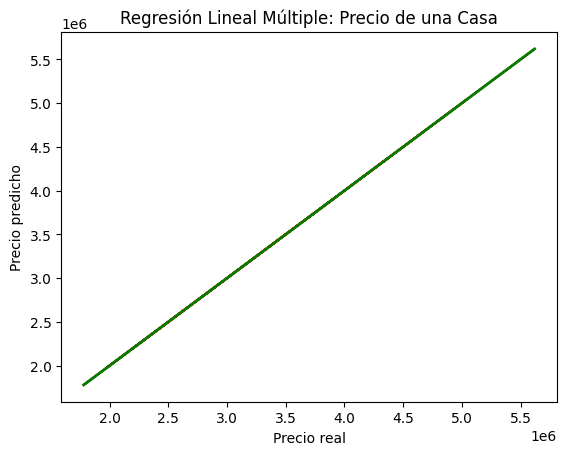

In [23]:

# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")
print(f"Coeficientes del modelo: {modelo.coef_}")
print(f"Intersección (ordenada al origen): {modelo.intercept_}")

# Visualizamos las predicciones versus los valores reales (Precio)
plt.plot(y_test, y_pred, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='green', lw=2)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Regresión Lineal Múltiple: Precio de una Casa')
plt.show()

1. Error Cuadrático Medio (MSE): Este número mide cuán cerca están las predicciones de los valores reales. Cuanto más bajo sea el MSE, mejor es el modelo.
2. Coeficiente de Determinación (R²): El R² indica qué tan bien se ajusta el modelo a los datos. Varía entre 0 y 1:
    * 0 significa que el modelo no explica nada de la variabilidad de los datos.
    * 1 significa que el modelo explica toda la variabilidad.
3. Coeficientes del Modelo: Estos números representan cómo cada variable (característica) contribuye al precio de la casa.
4. Intersección (Ordenada al Origen): Este número representa el precio base de la casa cuando el tamaño y el número de habitaciones son cero.